# <center>Women in the Workforce:<br>An Analysis of the Effects of More Women in the Workforce</center>
#### <center>*Contributors: Tamara Najjar, Sajid Khan, and Kathleen Graham*</center>

## <font color=orange>Number of Women in the Workforce Has Increased</font>

In [1]:
# dependencies and setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read and display women-in-workforce data set
civilian_labor_df = pd.read_csv('../data/civilian-labor-force-by-sex.csv')
civilian_labor_df.head()

,Year,Number of women in the civilian labor force (in thousands),Number of men in the civilian labor force (in thousands),Share of the civilian labor force who are women (percent),Share of the civilian labor force who are men (percent)
0,1948,"17,335","43,286",28.6,71.4
1,1949,"17,788","43,498",29.0,71.0
2,1950,"18,389","43,819",29.6,70.4
3,1951,"19,016","43,001",30.7,69.3
4,1952,"19,269","42,869",31.0,69.0


In [3]:
# make data frame
percent_women_df = pd.DataFrame({"Year": civilian_labor_df["Year"],
                                "Women in Workforce(%)": civilian_labor_df["Share of the civilian labor force who are women (percent)"]})

# drop years before 1960
new_women_df = percent_women_df.drop([0,1,2,3,4,5,6,7,8,9,10,11])
new_women_df.head()

,Year,Women in Workforce(%)
12,1960,33.4
13,1961,33.8
14,1962,34.0
15,1963,34.4
16,1964,34.8


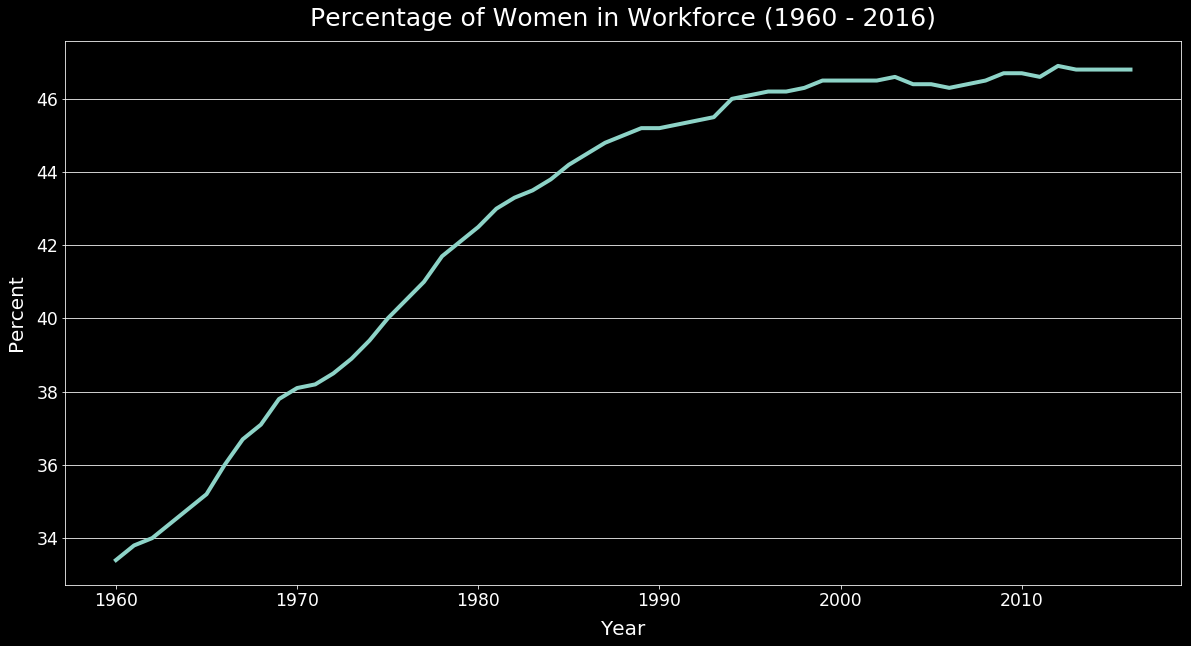

In [33]:
# plot crude % of women in workforce
plt.figure(figsize=(20,10))
plt.style.use(['dark_background'])
plt.title("Percentage of Women in Workforce (1960 - 2016)", fontsize=25, pad=15)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(new_women_df["Year"], new_women_df["Women in Workforce(%)"], linewidth=4)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/percentage-women-workforce-lineplot.png", bbox_inches="tight")
plt.show()

## <font color=orange>Birth Rates Have Declined</font>

In [5]:
# read birth rate data set
birth_rate_data = pd.read_csv("../data/crude-birth-rate.csv")

# drop years before 1960
birth_df = birth_rate_data.drop([57])
birth_df.head()

,DATE,"BIRTHS PER 1,000 PEOPLE"
0,1960,23.7
1,1961,23.3
2,1962,22.4
3,1963,21.7
4,1964,21.1


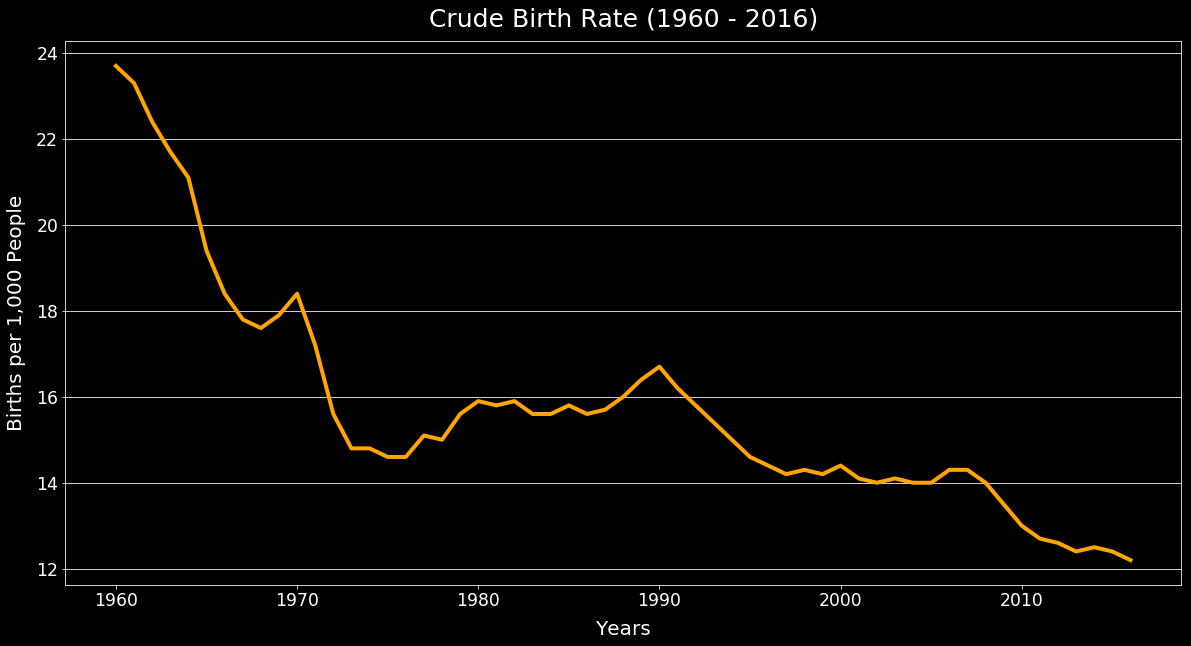

In [6]:
# plot crude birth rate
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.xlabel("Years",fontsize=20, labelpad=10)
plt.ylabel("Births per 1,000 People",fontsize=20, labelpad=10)
plt.title ("Crude Birth Rate (1960 - 2016)",  fontsize=25, pad=15)
plt.plot(birth_df["DATE"], birth_df["BIRTHS PER 1,000 PEOPLE"], linewidth=4, color='orange')
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/crude-US-birth-rates.png", bbox_inches="tight")
plt.show()

## <font color=orange>GDP Has Grown</font>

In [7]:
# read, clean up, and display GDP data set
gdp_df = pd.read_csv('../data/us-gdp-by-quarter.csv')
gdp_df.rename(columns={'DATE_BY_QUARTER':'Date',
                          'BILLIONS_OF_DOLLARS':'Dollars in Billions'}, 
                 inplace=True)
gdp_df.head()

,Date,Dollars in Billions
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2


In [8]:
# split year from full date (we want years instead of quarters)
gdp_df[["Year", "Month", "Day"]] = gdp_df["Date"].str.split("-", expand=True)

# calculate total gdp per year
yearly_gdp = gdp_df.groupby(["Year"]).sum()

# set index and display
yearly_gdp = yearly_gdp.reset_index('Year')

# drop year 2016 because it only contains first quarter of data
clean_yearly_gdp = yearly_gdp.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,69])
dollars = clean_yearly_gdp["Dollars in Billions"]

# change years from strings to integers
clean_yearly_gdp["Year"]=clean_yearly_gdp["Year"].astype(int)
clean_yearly_gdp.head()

,Year,Dollars in Billions
13,1960,2173.1
14,1961,2253.1
15,1962,2420.5
16,1963,2554.3
17,1964,2743.1


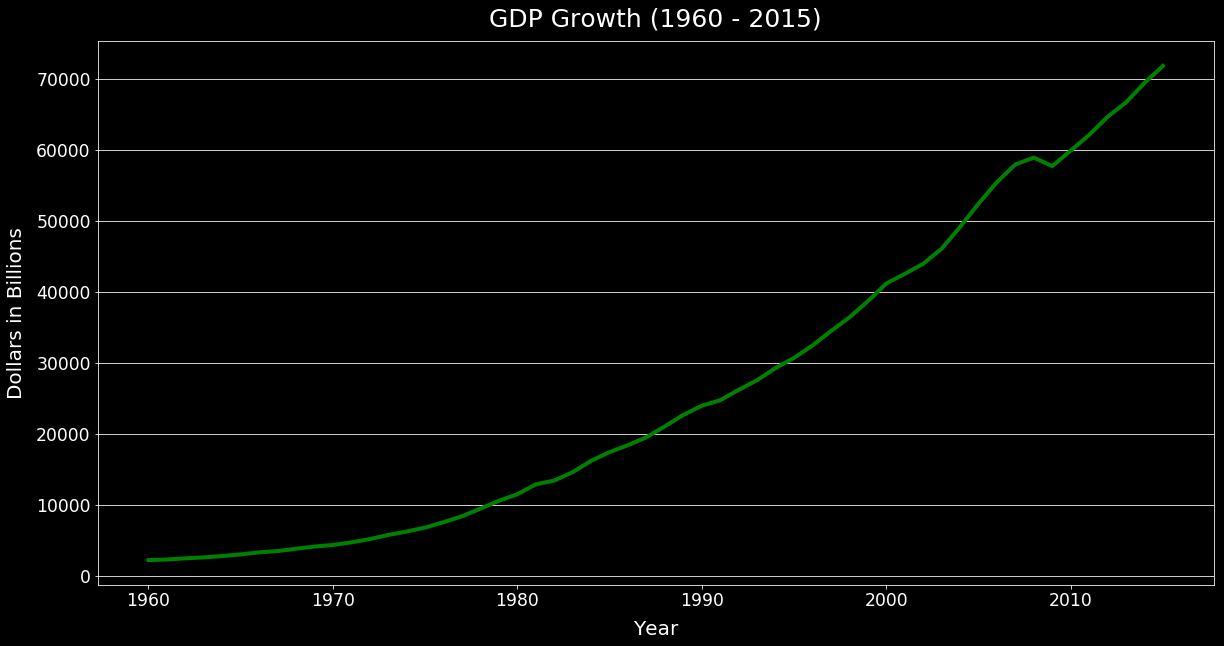

In [9]:
# plot crude data for GDP Growth
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("GDP Growth (1960 - 2015)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Dollars in Billions", fontsize=20, labelpad=10)
plt.plot(clean_yearly_gdp["Year"],dollars, color='green', linewidth=4)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/gdp-growth-lineplot.png",bbox_inches="tight")
plt.show()

## <font color=orange>GDP Growth by Certain States in Main Regions</font>

In [10]:
# merged_gdp_all.rename(columns={"Date", "IL GDP", "TX GDP", "CA GDP", "NY GDP"}, inplace=True)

il_gdp_base = "../data/il_gdp.csv"
ca_gdp_base = "../data/ca_gdp.csv"
tx_gdp_base = "../data/tx_gdp.csv"
ny_gdp_base = "../data/ny_gdp.csv"

il_gdp = pd.read_csv(il_gdp_base)
ca_gdp = pd.read_csv(ca_gdp_base)
tx_gdp = pd.read_csv(tx_gdp_base)
ny_gdp = pd.read_csv(ny_gdp_base)

merged_gdp_mid = pd.merge(il_gdp, tx_gdp, on="DATE")
merged_gdp_coastal = pd.merge(ca_gdp, ny_gdp, on="DATE")

merged_gdp_all = pd.merge(merged_gdp_mid, merged_gdp_coastal, on="DATE")
merged_gdp_all.head()

,DATE,ILNGSP,TXNGSP,CARGSP,NYNGSP
0,1997,415770.7,610256.5,1378653.7,718322.5
1,1998,436166.7,645696.9,1470393.0,745223.7
2,1999,459322.1,681335.4,1582377.4,793721.1
3,2000,487212.7,738871.0,1709938.7,838660.3
4,2001,502260.3,773006.7,1702775.7,877149.3


In [11]:
il_x_axis = merged_gdp_all["DATE"]
il_y_axis = merged_gdp_all["ILNGSP"]

tx_x_axis = merged_gdp_all["DATE"]
tx_y_axis = merged_gdp_all["TXNGSP"]

ca_x_axis = merged_gdp_all["DATE"]
ca_y_axis = merged_gdp_all["CARGSP"]

ny_x_axis = merged_gdp_all["DATE"]
ny_y_axis = merged_gdp_all["NYNGSP"]

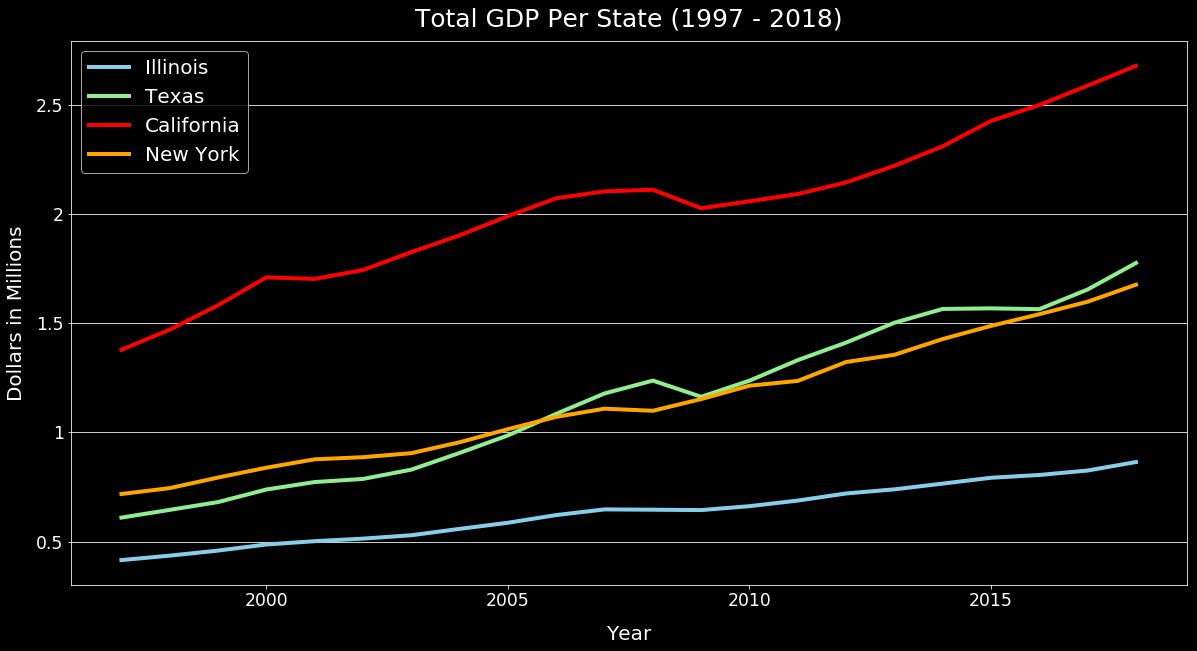

In [12]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.plot(il_x_axis, il_y_axis, label="Illinois", color='skyblue', linewidth=4)
plt.plot(tx_x_axis, tx_y_axis, label="Texas", color='lightgreen',linewidth=4)
plt.plot(ca_x_axis, ca_y_axis, label="California", color='red', linewidth=4)
plt.plot(ny_x_axis, ny_y_axis, label="New York", linewidth=4, color='orange')
plt.title("Total GDP Per State (1997 - 2018)", fontsize=25, pad=15)
plt.xlabel("Year", fontsize=20, labelpad=15)
plt.ylabel("Dollars in Millions", fontsize=20, labelpad=10)
plt.yticks([500000,1000000,1500000,2000000,2500000],[0.5,1,1.5,2,2.5])
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.legend(loc=2, fontsize=20)
plt.savefig("../images/GDP-per-state.png", bbox_inches='tight')
plt.show()

## <font color=orange>Women in the Workforce vs. GDP Growth</font>

In [13]:
# merge data frames on year and drop first rows not needed to plot
total_df = pd.merge(percent_women_df,clean_yearly_gdp, how="left", on="Year")

# drop years before 1960
TOTAL_df = total_df.drop([0,1,2,3,4,5,6,7,8,9,10,11])
TOTAL_df.head()

,Year,Women in Workforce(%),Dollars in Billions
12,1960,33.4,2173.1
13,1961,33.8,2253.1
14,1962,34.0,2420.5
15,1963,34.4,2554.3
16,1964,34.8,2743.1


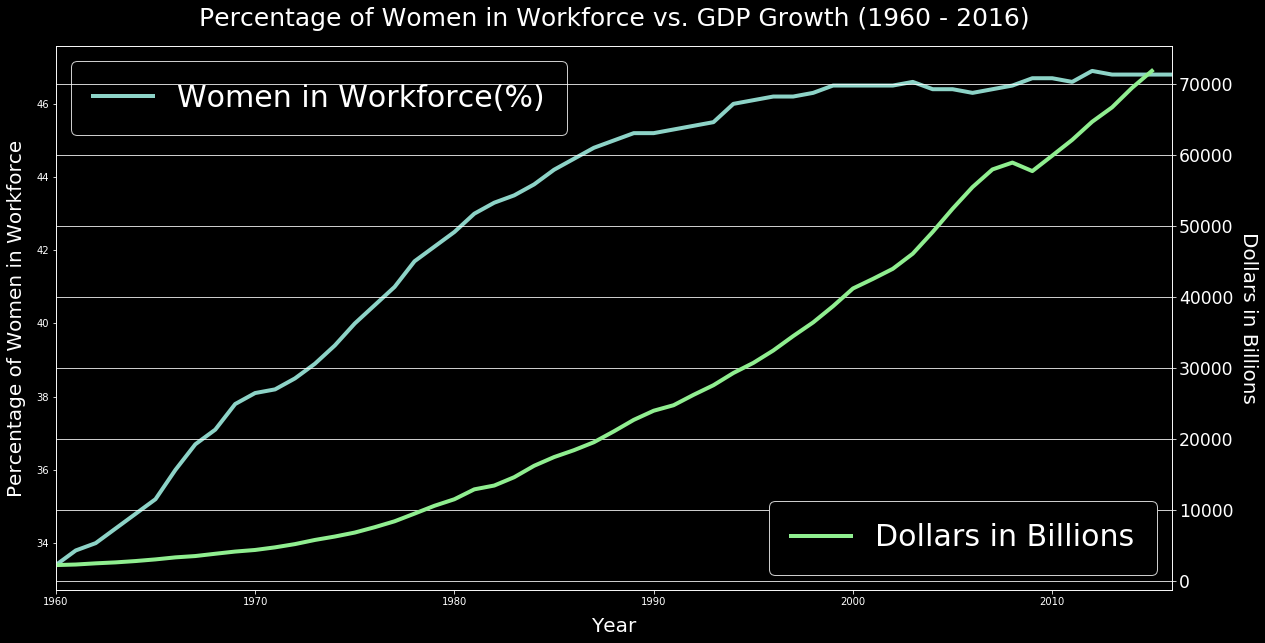

In [14]:
# plot two women in workforce and GDP together
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plt.style.use('dark_background')
TOTAL_df.plot(x="Year", y="Women in Workforce(%)", ax=ax, linewidth=4)
TOTAL_df.plot(x="Year", y="Dollars in Billions", color="lightgreen", linewidth=4, secondary_y=True, ax=ax)
ax.set_title("Percentage of Women in Workforce vs. GDP Growth (1960 - 2016)", fontsize=25, pad=20)
ax.set_xlabel("Year", fontsize=20, labelpad=10)
ax.set_ylabel("Percentage of Women in Workforce", fontsize=20, labelpad=10)
plt.ylabel("Dollars in Billions", fontsize=20, rotation=-90, labelpad=25)
ax.legend(loc=2, fontsize=30, framealpha=1, borderpad=0.75)
plt.legend(loc=4, fontsize=30,framealpha=1, borderpad=0.75)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
fig.savefig("../Images/percent-women-workforce-gdp-growth-double-lineplot.png",bbox_inches="tight")
plt.show()

## <font color=orange>Average Hourly Cost Per Employee</font>

In [15]:
# average cost per employer per hour
employee_cost_df = pd.read_csv('../data/avg-hourly-employee-cost.csv')
employee_cost_df.head()

,Year,Month,Value,Period
0,1969,December,37.7,M12
1,1969,December,37.7,M12
2,1969,December,37.7,M12
3,1969,December,37.7,M12
4,1969,December,37.7,M12


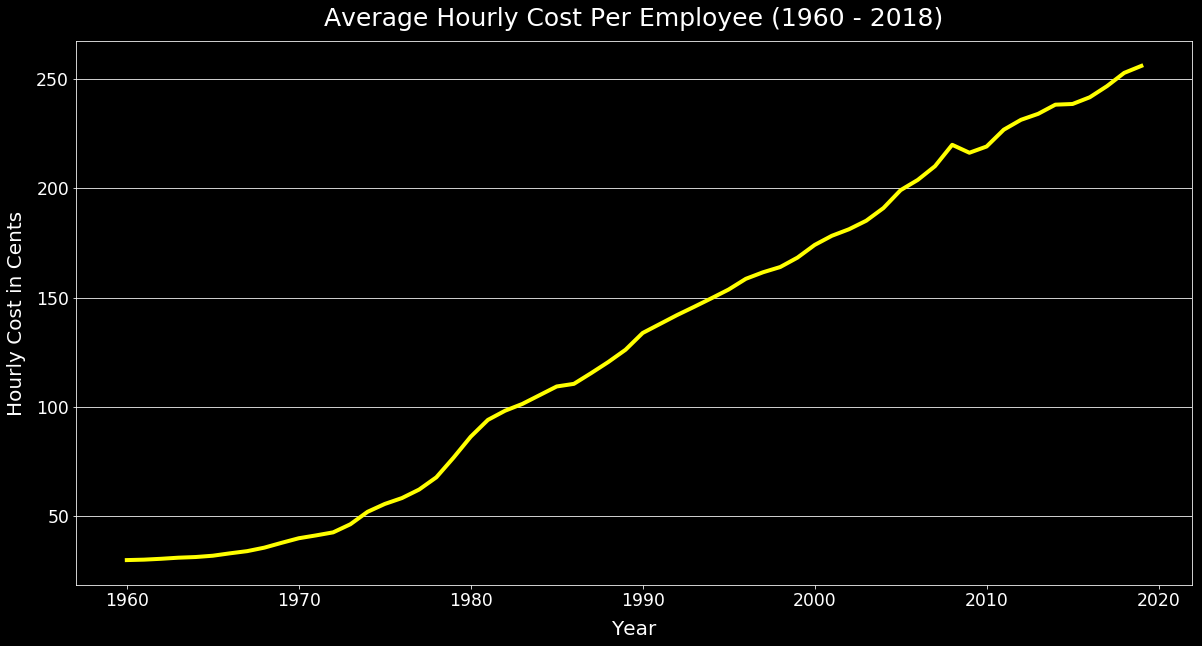

In [38]:
# group by year and calculate unique years in proper order and max value per year
byyear = employee_cost_df.groupby('Year')
x = np.sort(employee_cost_df["Year"].unique())
y = byyear['Value'].max()

# plot hourly cost per employee
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("Average Hourly Cost Per Employee (1960 - 2018)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Hourly Cost in Cents", fontsize=20, labelpad=10)
plt.plot(x, y, color='yellow', linewidth=4, label="average cost")
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/average-hourly-cost-per-employee-lineplot.png",bbox_inches="tight")
plt.show()

## <font color=orange>Exploring Stock Market Data</font>

In [35]:
# read and display stock market data
stock_year_df = pd.read_csv('../data/stock-by-year.csv')
stock_year_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/1960,59.910000,60.389999,55.610001,55.610001,55.610001,"63,920,000"
1,2/1/1960,55.959999,56.820000,54.730000,56.119999,56.119999,"60,500,000"
2,3/1/1960,56.009998,56.009998,53.470001,55.340000,55.340000,"65,710,000"
3,4/1/1960,55.430000,56.590000,54.369999,54.369999,54.369999,"57,300,000"
4,5/1/1960,54.130001,55.830002,54.130001,55.830002,55.830002,"68,790,000"


## <font color=orange>Women in Workforce by Race</font>

In [36]:
# read and display laborforce by race
labor_df = pd.read_csv('../data/laborforce-participation-rate.csv')
labor_df.head()

,Year,All Women,All Men,White Women,White Men,Black Women,Black Men,Asian Women,Asian Men,Hispanic Women,Hispanic Men
0,1948,32.7,86.6,-,-,-,-,-,-,-,-
1,1949,33.1,86.4,-,-,-,-,-,-,-,-
2,1950,33.9,86.4,-,-,-,-,-,-,-,-
3,1951,34.6,86.5,-,-,-,-,-,-,-,-
4,1952,34.7,86.3,-,-,-,-,-,-,-,-


In [18]:
# make data frame for women data
women_laborforce_df = pd.DataFrame({"Year": labor_df["Year"],
                                   "White Women": labor_df["White Women"],
                                   "Black Women": labor_df["Black Women"],
                                   "Asian Women": labor_df["Asian Women"],
                                   "Hispanic Women": labor_df["Hispanic Women"]})

# drop blank years
women_by_race_df = women_laborforce_df.drop([0,1,2,3,4,5,6,7,8,9,10,11])
women_by_race_df.head()

,Year,White Women,Black Women,Asian Women,Hispanic Women
12,1960,36.5,-,-,-
13,1961,36.9,-,-,-
14,1962,36.7,-,-,-
15,1963,37.2,-,-,-
16,1964,37.5,-,-,-


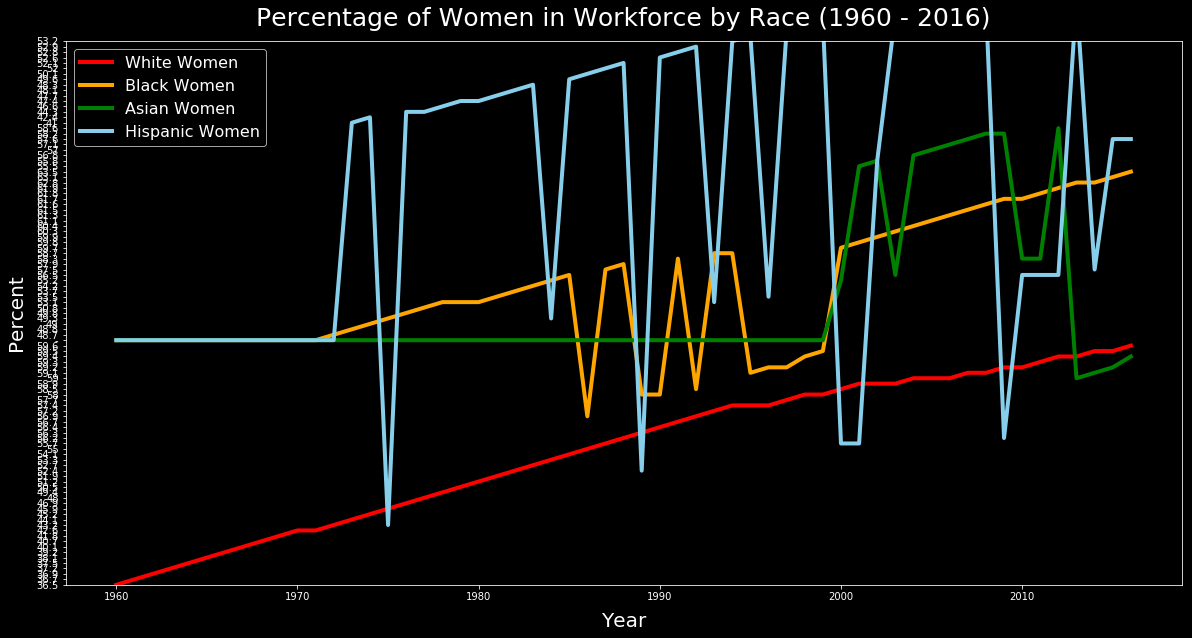

In [19]:
# multiple line plot
plt.figure(figsize=(20,10))
plt.style.use('seaborn-deep')
plt.title("Percentage of Women in Workforce by Race (1960 - 2016)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(women_by_race_df["Year"], np.sort(women_by_race_df["White Women"]), color="red", linewidth=4, label="White Women")
plt.plot(women_by_race_df["Year"], np.sort(women_by_race_df["Black Women"]), color="orange", linewidth=4, label="Black Women")
plt.plot(women_by_race_df["Year"], np.sort(women_by_race_df["Asian Women"]), color="green", linewidth=4, label="Asian Women")
plt.plot(women_by_race_df["Year"], np.sort(women_by_race_df["Hispanic Women"]), color="skyblue", linewidth=4, label="Hispanic Women")
plt.legend(loc=2, fontsize=16)
plt.ylim(0,100)
plt.savefig("../Images/women-workforce-byrace-lineplot.png",bbox_inches="tight")
plt.show()

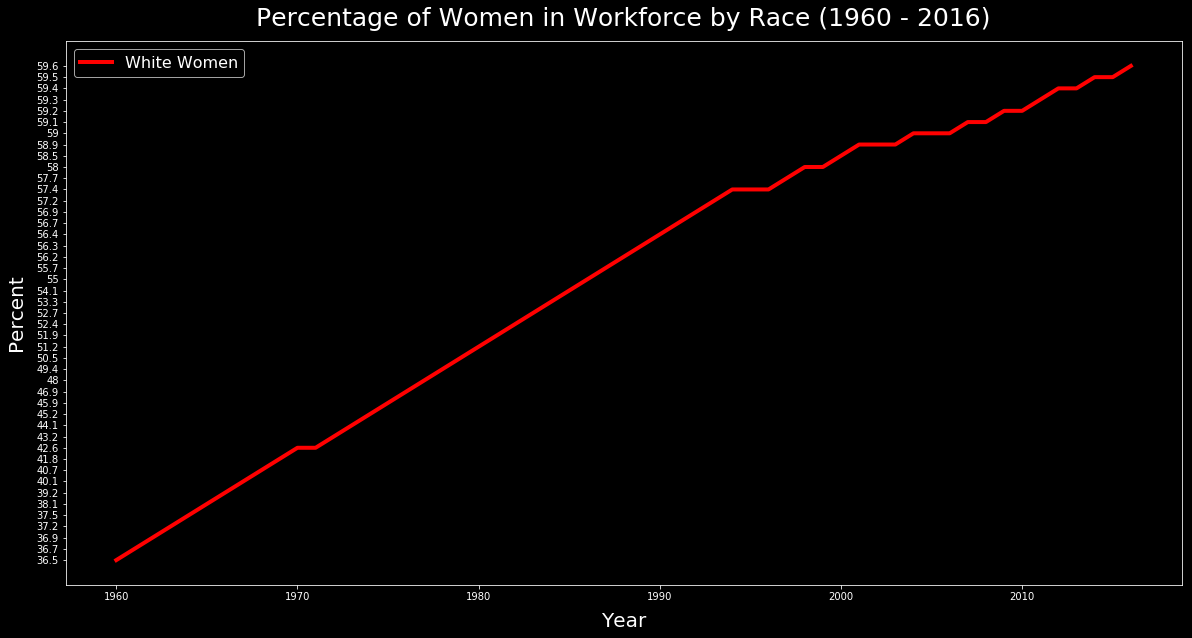

In [20]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-deep')
plt.title("Percentage of Women in Workforce by Race (1960 - 2016)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(women_by_race_df["Year"], np.sort(women_by_race_df["White Women"]), color="red", linewidth=4, label="White Women")
plt.legend(loc=2, fontsize=16)
plt.savefig("../Images/women-workforce-byrace-lineplot.png",bbox_inches="tight")
plt.show()

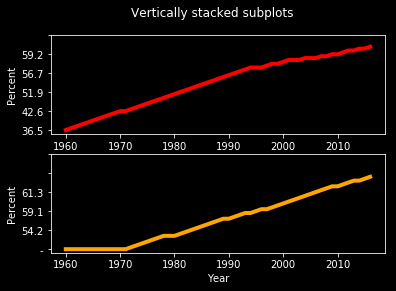

In [21]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(women_by_race_df["Year"], np.sort(women_by_race_df["White Women"]), color="red", linewidth=4, label="White Women")
axs[1].plot(women_by_race_df["Year"], np.sort(women_by_race_df["Black Women"]), color="orange", linewidth=4, label="Black Women")
for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Percent',yticks=(0,10,20,30,40,50))

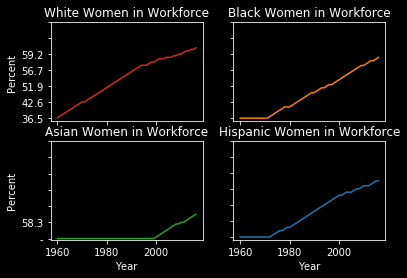

In [22]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(women_by_race_df["Year"], np.sort(women_by_race_df["White Women"]), 'tab:red')
axs[0, 0].set_title('White Women in Workforce')
axs[0, 1].plot(women_by_race_df["Year"], np.sort(women_by_race_df["Black Women"]), 'tab:orange')
axs[0, 1].set_title('Black Women in Workforce')
axs[1, 0].plot(women_by_race_df["Year"], np.sort(women_by_race_df["Asian Women"]), 'tab:green')
axs[1, 0].set_title('Asian Women in Workforce')
axs[1, 1].plot(women_by_race_df["Year"], np.sort(women_by_race_df["Hispanic Women"]), 'tab:blue')
axs[1, 1].set_title('Hispanic Women in Workforce')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Percent', yticks=(0,10,20,30,40,50,60))
    ax.label_outer()    

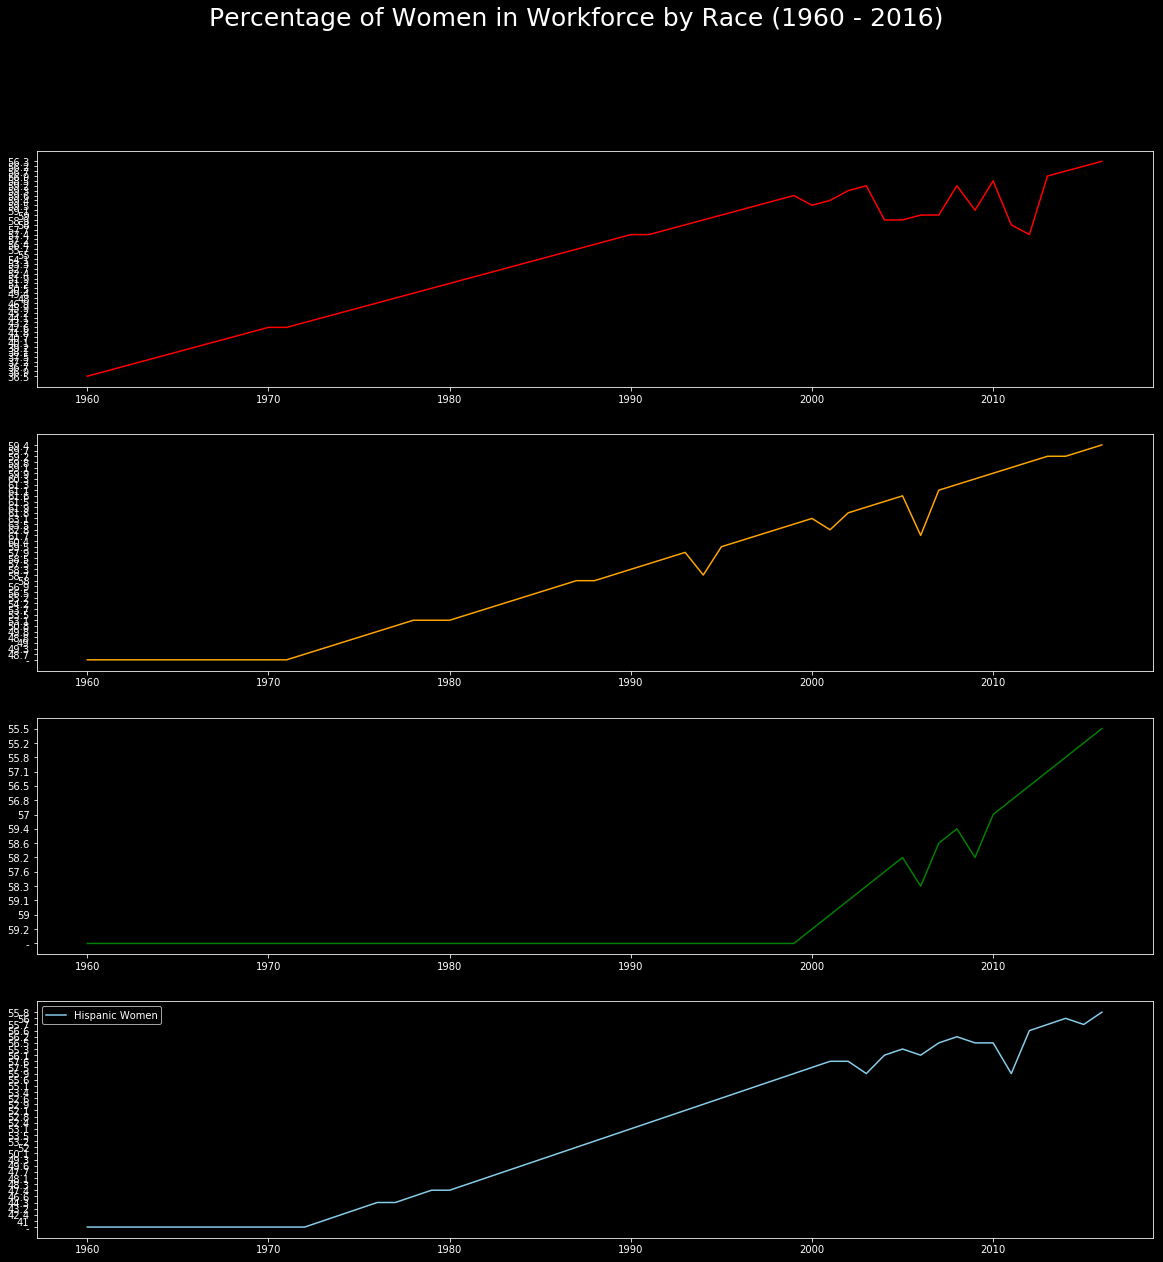

In [23]:
# separate plots
plt.figure(figsize=(20, 20))
plt.subplot(411)
plt.plot(women_by_race_df["Year"], women_by_race_df["White Women"], color="red")
plt.subplot(412)
plt.plot(women_by_race_df["Year"], women_by_race_df["Black Women"], color="orange")
plt.subplot(413)
plt.plot(women_by_race_df["Year"], women_by_race_df["Asian Women"], color="green")
plt.subplot(414)
plt.plot(women_by_race_df["Year"], women_by_race_df["Hispanic Women"], color="skyblue")
plt.suptitle("Percentage of Women in Workforce by Race (1960 - 2016)", fontsize=25)
plt.legend()
plt.savefig("../Images/women-workforce-byrace2-lineplot.png",bbox_inches="tight")
plt.show()

# fix tick locations!!!

## <font color=orange>Women in Workforce by Age</font>

In [24]:
# read data from women in workforce by age
age_df = pd.read_csv('../data/women-workforce-byage.csv')
age_df.head()

,Year,16 years and older,16 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and older
0,1948,32.7,43.9,33.2,36.9,35.0,24.3,9.1
1,1949,33.1,43.9,33.4,38.1,35.9,25.3,9.6
2,1950,33.9,43.9,34.0,39.1,37.9,27.0,9.7
3,1951,34.6,44.8,35.4,39.8,39.7,27.6,8.9
4,1952,34.7,43.6,35.4,40.4,40.1,28.7,9.1


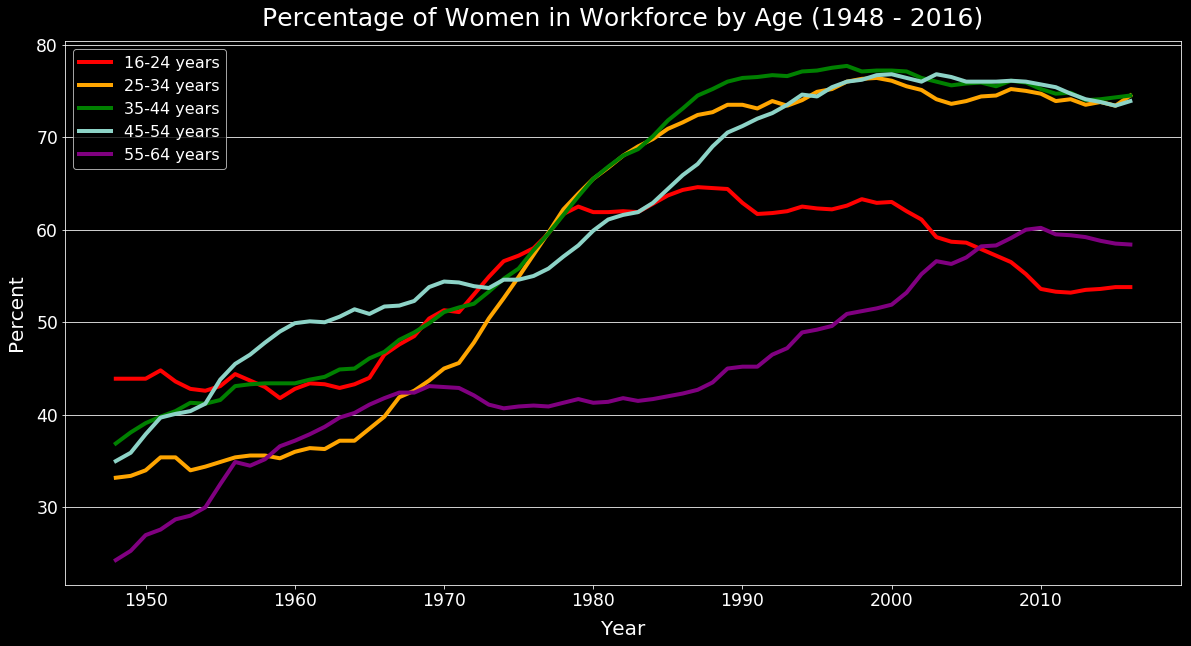

In [25]:
# plot women in workforce by age
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("Percentage of Women in Workforce by Age (1948 - 2016)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(age_df["Year"], age_df["16 to 24 years"], color='red', linewidth=4, label="16-24 years")
plt.plot(age_df["Year"], age_df["25 to 34 years"], color='orange', linewidth=4, label="25-34 years")
plt.plot(age_df["Year"], age_df["35 to 44 years"], color='green', linewidth=4, label="35-44 years")
plt.plot(age_df["Year"], age_df["45 to 54 years"], linewidth=4, label="45-54 years")
plt.plot(age_df["Year"], age_df["55 to 64 years"], color='purple', linewidth=4, label="55-64 years")
plt.legend(loc=2, fontsize=16)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/women-workforce-byage-multi-lineplot.png",bbox_inches="tight")
plt.show()

## <font color=orange>Comparing Separate Data Sets</font>

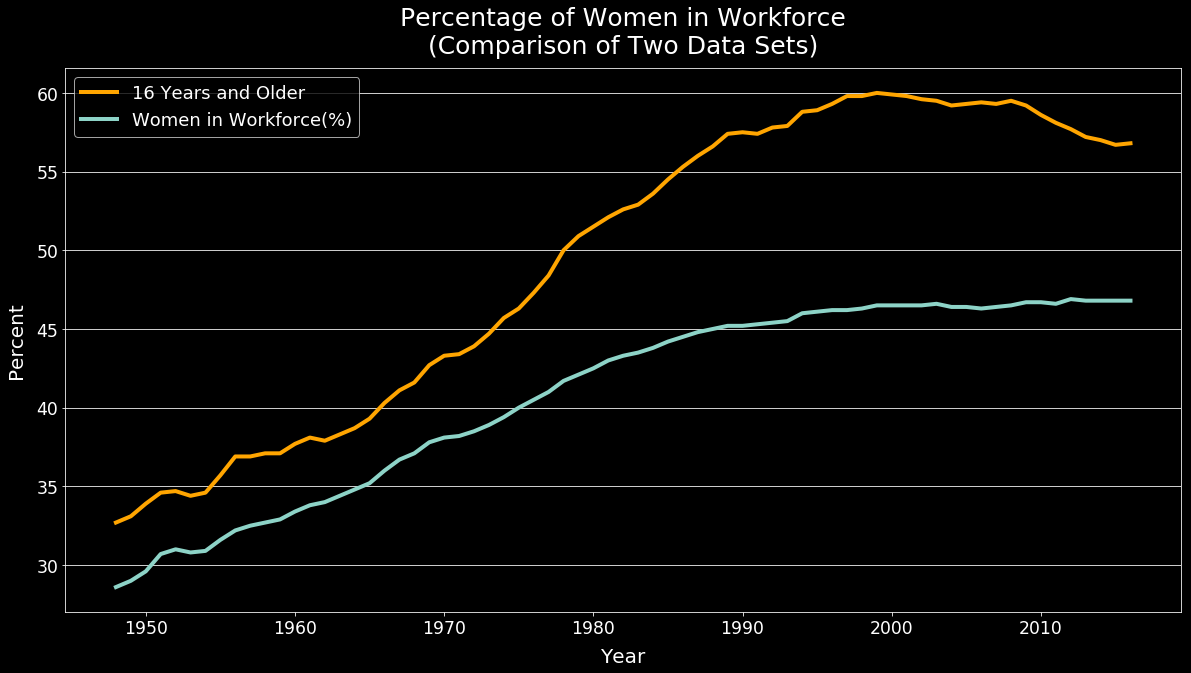

In [26]:
# checking total against the first crude data set of percentage of women in workforce 
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("Percentage of Women in Workforce\n(Comparison of Two Data Sets)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(age_df["Year"], age_df["16 years and older"], color="orange", linewidth=4, label="16 Years and Older")
plt.plot(percent_women_df["Year"], percent_women_df["Women in Workforce(%)"], linewidth=4)
plt.legend(loc=0, fontsize=18)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/checking-crude-total-workforce.png",bbox_inches="tight")
plt.show()

## <font color=orange>Women in Workforce with Children</font>

In [27]:
children_df = pd.read_csv('../data/women-working-married-with-children-by-year.csv')
children_df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
children_df.head()

,Year,With children ages 6 to 17,With children under age 6
0,1975,54.9,39.0
1,1976,56.2,40.1
2,1977,58.3,41.2
3,1978,60.0,44.0
4,1979,61.6,45.7


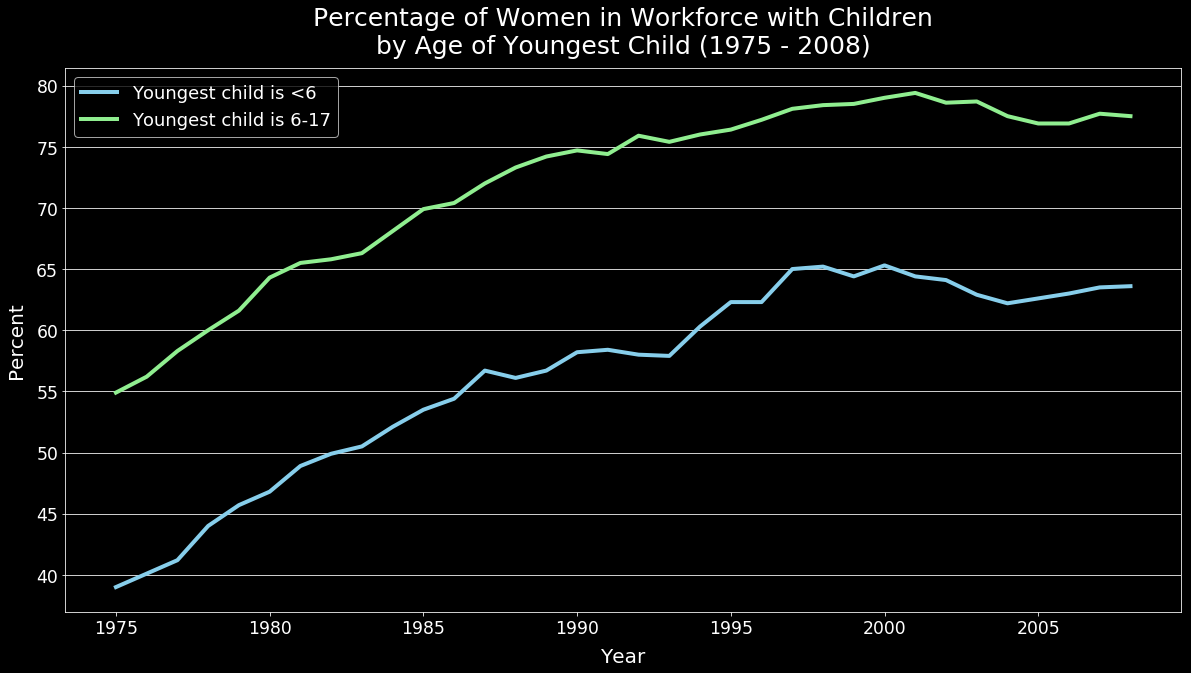

In [28]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("Percentage of Women in Workforce with Children\nby Age of Youngest Child (1975 - 2008)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Percent", fontsize=20, labelpad=10)
plt.plot(children_df["Year"], children_df["With children under age 6"], color='skyblue', linewidth=4, label="Youngest child is <6")
plt.plot(children_df["Year"], children_df["With children ages 6 to 17"], color='lightgreen', linewidth=4, label="Youngest child is 6-17")
plt.legend(loc=2, fontsize=18)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/women-workforce-byyoungestchild-lineplot.png",bbox_inches="tight")
plt.show()

## <font color=orange>Employment Status of Women in the Workforce by Age of Youngest Child</font>

In [29]:
# read employment data by employment status
parent_data = pd.read_csv('../data/employment-statusbygender-ageofyoungestchild.csv')
parent_data.head()

,Age of youngest child,Mothers Full-time,Mothers Part-time,Fathers Full-time,Fathers Part-time
0,under 3 years,72.4,27.6,95.3,4.7
1,3 to 5 years,75.4,24.6,95.5,4.5
2,6 to 17 years,77.9,22.1,95.8,4.2
3,under 18 years,76.3,23.7,95.6,4.4


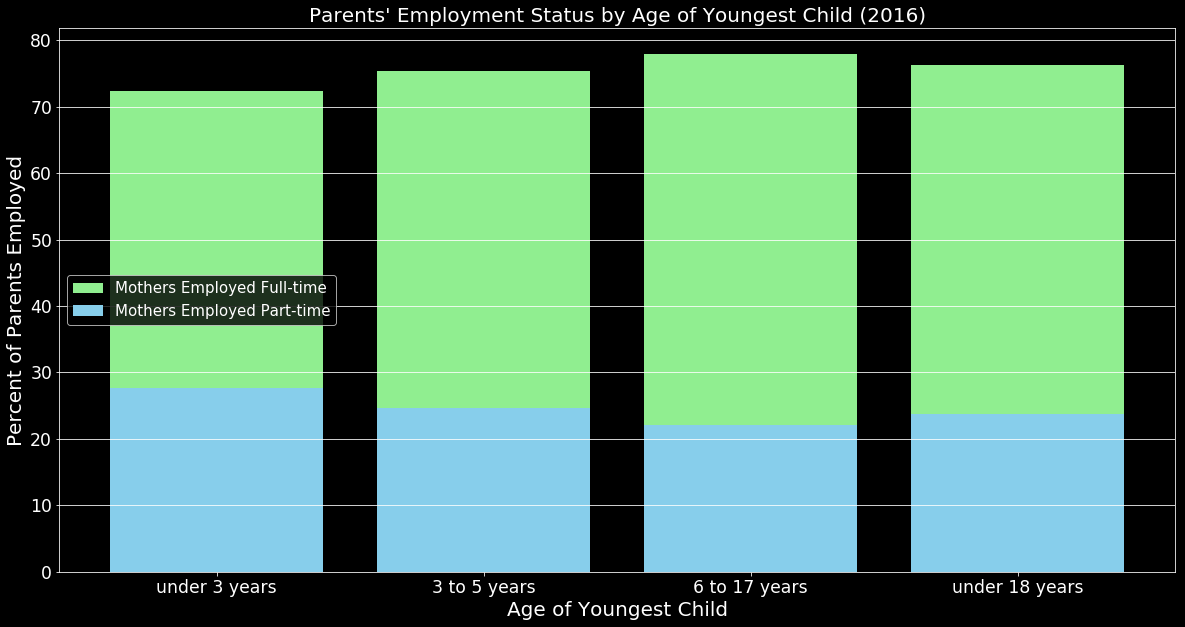

In [40]:
# plot employment status for parents
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("Parents' Employment Status by Age of Youngest Child (2016)", fontsize=20)
plt.xlabel("Age of Youngest Child", fontsize=20)
plt.ylabel("Percent of Parents Employed", fontsize=20)
mom1 = plt.bar(parent_data["Age of youngest child"], parent_data["Mothers Full-time"], color="lightgreen", label="Mothers Employed Full-time")
mom2 = plt.bar(parent_data["Age of youngest child"], parent_data["Mothers Part-time"], color="skyblue", label="Mothers Employed Part-time")
plt.legend(loc=6, fontsize=15)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../images/parent-employment-status-by-youngest-child-bar-chart.png", bbox_inches="tight")
plt.show()

## <font color=orange>Pet Expenditure Has Increased</font>

In [31]:
# read data from pet expenditure data set
pet_expend_data = pd.read_csv("../data/pet-expenditure.csv")
pet_expend_data.head()

,DATE,PET EXPENDITURES IN BILLIONS
0,1960,0.838
1,1961,0.906
2,1962,0.960
3,1963,1.045
4,1964,1.318


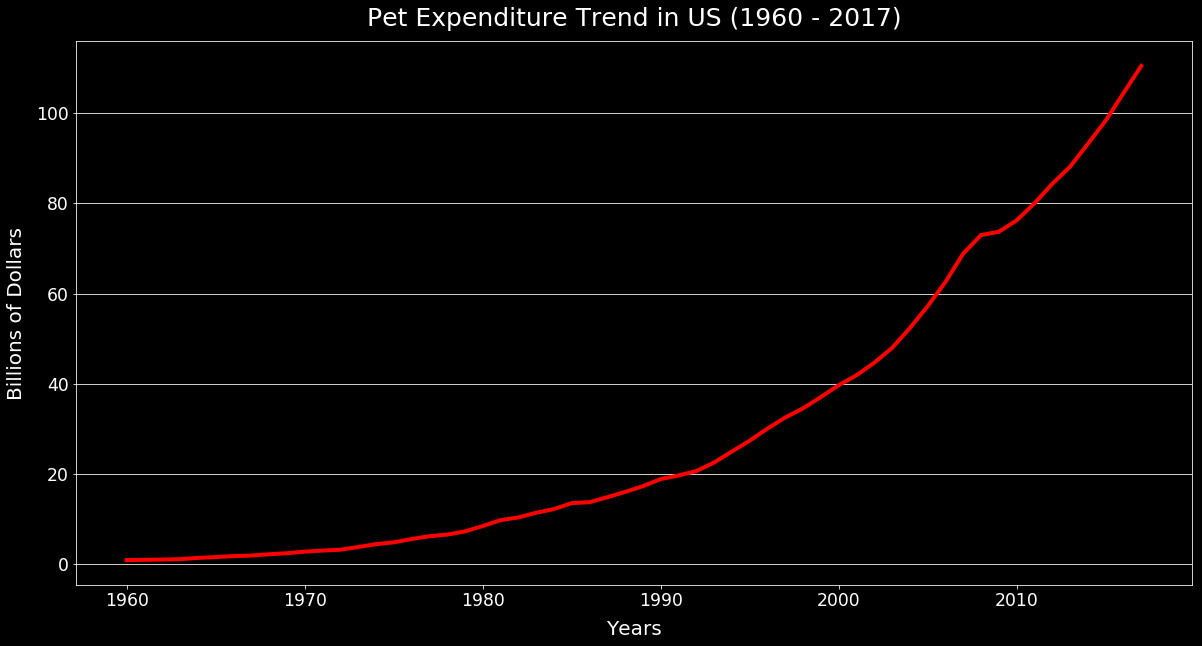

In [32]:
# plot pet expenditure
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title ("Pet Expenditure Trend in US (1960 - 2017)", fontsize=25, pad=15)
plt.xlabel("Years", fontsize=20, labelpad=10)
plt.ylabel("Billions of Dollars", fontsize=20, labelpad=10)
plt.plot(pet_expend_data["DATE"], pet_expend_data["PET EXPENDITURES IN BILLIONS"], linewidth=4, color="red")
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../images/pet-expend.png", bbox_inches="tight")
plt.show()